# Part1 : Checking and correcting errors in the collected data

In [1]:
import pandas as pd
import numpy as np
import torch 
from torch import nn
from torch.optim import SGD
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split 
from torch.utils.data import DataLoader, TensorDataset, random_split

In [2]:
data = pd.read_csv('Proj1_Data.csv') # read all datas in file Proj1_Data.csv
df = pd.DataFrame(data) # Constructing DataFrame from datas in file Proj1_Data.csv
print(df) # print all datas

       RowNumber  CustomerId    Surname  CreditScore Geography  Gender   Age  \
0              1    15634602   Hargrave          619    France  Female  42.0   
1              2    15647311       Hill          608     Spain  Female  41.0   
2              3    15619304       Onio          502    France  Female  42.0   
3              4    15701354       Boni          699    France  Female  39.0   
4              5    15737888   Mitchell          850     Spain  Female  43.0   
...          ...         ...        ...          ...       ...     ...   ...   
9997        9998    15584532        Liu          709    France  Female  36.0   
9998        9999    15682355  Sabbatini          772   Germany    Male  42.0   
9999       10000    15628319     Walker          792    France  Female  28.0   
10000      10001    15628319     Walker          792       NaN     NaN   NaN   
10001      10002    15682355  Sabbatini          772   Germany     NaN   NaN   

       Tenure    Balance  NumOfProducts

In [3]:
data.head(n=6) # Return the first n rows.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
5,6,15574012,Chu,645,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0


In [4]:
data.tail(n=6) # Returns the last n rows.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9996,9997,15569892,Johnstone,516,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0
9997,9998,15584532,Liu,709,France,Female,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0
9999,10000,15628319,Walker,792,France,Female,28.0,4.0,130142.79,1.0,1.0,0.0,38190.78,0.0
10000,10001,15628319,Walker,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,10002,15682355,Sabbatini,772,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def check_data(): # function for check missing values 
    if data.isna().any().any(): # Detect missing values.
        missing_values = data.isna().sum()
        print("Missing values:")
        print(missing_values)
        #Handle missing values
        data.dropna(inplace=True) # Drop missing values

    else:
        print("No missing values found.")
   
    
check_data() # Call check_data() function for detect and drop missing values


Missing values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             2
Age                2
Tenure             2
Balance            2
NumOfProducts      2
HasCrCard          2
IsActiveMember     2
EstimatedSalary    2
Exited             2
dtype: int64


In [6]:
data.tail(n=6)  # Returns the last n rows.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9994,9995,15719294,Wood,800,France,Female,29.0,2.0,0.00,2.0,0.0,0.0,167773.55,0.0
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0
9997,9998,15584532,Liu,709,France,Female,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0
9999,10000,15628319,Walker,792,France,Female,28.0,4.0,130142.79,1.0,1.0,0.0,38190.78,0.0


In [7]:
check_data() # Call check_data() function for check again to see no missing values exist.

No missing values found.


# Map

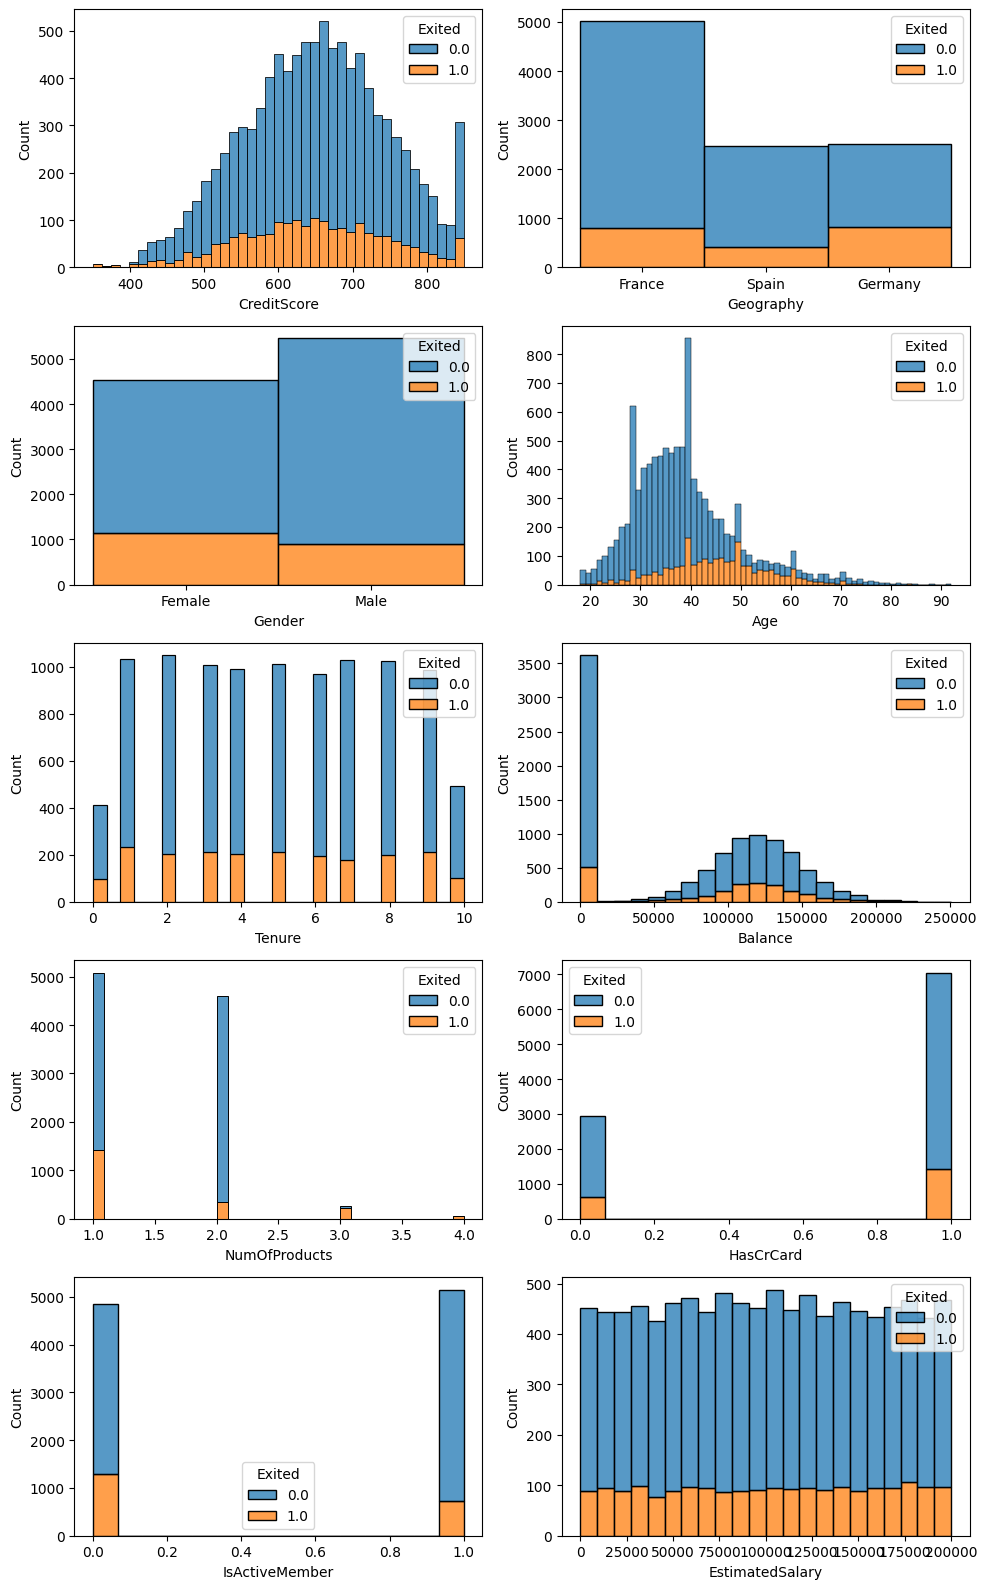

In [8]:
# Columns to plot
columns = [
    "CreditScore", "Geography", "Gender", "Age", "Tenure",
    "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]


fig, axs = plt.subplots(5, 2, figsize=(10, 16))

# Iterate over columns and plot
for i, column in enumerate(columns):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    sns.histplot(x=column, hue="Exited", multiple='stack', data=df, ax=axs[row, col])

plt.tight_layout()
plt.show()

# Part2 : Test Rescaling

In [9]:
# Data scaling is applied to numeric columns. In our "data" dataset we have 11 numeric columns:
tips_ds_numeric = data.filter(["RowNumber", "CustomerId", "CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary",	"Exited"], axis = 1)
# plot some statistical values for the columns in our dataset using the describe() method.
tips_ds_numeric.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
#  use the MinMaxScaler class from the sklearn.preprocessing module to perform min/max scaling
minmaxS = MinMaxScaler()

# The fit_transform method of the class performs the min/max scaling on the input Pandas Dataframe
data_minmaxS = minmaxS.fit_transform(tips_ds_numeric)

# Similarly, the script below converts the NumPy array returned by the fit_transform()
#  to a Pandas Dataframe which contains our normalized values between 0 and 1.
data_minmaxS_df = pd.DataFrame(data_minmaxS, columns = tips_ds_numeric.columns)

# Return the first n rows.
data_minmaxS_df.head(n=10000)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.0000,0.275616,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.0001,0.326454,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.0002,0.214421,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.0003,0.542636,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,0.0004,0.688778,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.9996,0.162119,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0
9996,0.9997,0.016765,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0
9997,0.9998,0.075327,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0
9998,0.9999,0.466637,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0


# Converting data to Tensor and Seprate data forms to train and test part

In [11]:
y = data_minmaxS_df["Exited"]
x = data_minmaxS_df.drop("Exited", axis = 1)

x.head()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0000,0.275616,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.0001,0.326454,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.0002,0.214421,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.0003,0.542636,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,0.0004,0.688778,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [12]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

In [13]:

# using the train test split function 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=104, train_size=0.8, shuffle=True) 
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=104, train_size=0.8, shuffle=True) 

# printing out train and test sets 
print('x_train : ') 
print(x_train.head()) 
print(x_train.shape) 
print('-----------------------------------------------------------------') 
print('x_test : ') 
print(x_test.head()) 
print(x_test.shape) 



x_train : 
      RowNumber  CustomerId  CreditScore       Age  Tenure   Balance  \
9919   0.991999    0.929573        0.676  0.108108     0.0  0.000000   
7994   0.799480    0.590982        0.338  0.040541     0.1  0.604634   
3564   0.356436    0.949722        0.994  0.445946     0.5  0.388866   
6734   0.673467    0.630496        0.538  0.500000     0.0  0.000000   
1588   0.158816    0.769370        0.794  0.581081     0.7  0.621659   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
9919       0.333333        1.0             0.0         0.528917  
7994       0.666667        1.0             1.0         0.850717  
3564       0.000000        0.0             0.0         0.720931  
6734       0.666667        0.0             0.0         0.304024  
1588       0.000000        0.0             1.0         0.737784  
(8000, 10)
--------------------------------
x_test : 
      RowNumber  CustomerId  CreditScore       Age  Tenure   Balance  \
4996   0.499650    0.218570       

In [14]:
print('x_val : ') 
print(x_val.head()) 
print(x_val.shape) 

x_val : 
      RowNumber  CustomerId  CreditScore       Age  Tenure   Balance  \
4996   0.499650    0.218570        0.300  0.351351     0.9  0.641050   
5894   0.589459    0.329478        0.466  0.283784     0.1  0.515346   
4295   0.429543    0.203021        0.252  0.216216     0.8  0.446019   
2753   0.275328    0.835197        0.260  0.135135     0.6  0.000000   
6163   0.616362    0.062491        0.276  0.135135     0.7  0.554991   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
4996       0.333333        1.0             0.0         0.981344  
5894       0.333333        1.0             0.0         0.365515  
4295       0.000000        0.0             1.0         0.986145  
2753       0.333333        0.0             0.0         0.240625  
6163       0.333333        1.0             0.0         0.533991  
(2000, 10)


In [15]:
print('y_train : ') 
print(y_train.head()) 
print(y_train.shape) 
print('---------------------------------') 
print('y_test : ') 
print(y_test.head()) 
print(y_test.shape)
print('---------------------------------') 
print('y_val : ') 
print(y_val.head()) 
print(y_val.shape)

y_train : 
9919    0.0
7994    1.0
3564    1.0
6734    1.0
1588    0.0
Name: Exited, dtype: float64
(8000,)
---------------------------------
y_test : 
4996    0.0
5894    0.0
4295    1.0
2753    0.0
6163    0.0
Name: Exited, dtype: float64
(2000,)
---------------------------------
y_val : 
4996    0.0
5894    0.0
4295    1.0
2753    0.0
6163    0.0
Name: Exited, dtype: float64
(2000,)


In [16]:
# Convert data to tensor
X_train = torch.from_numpy(x_train.values).type(torch.float)
Y_train = torch.from_numpy(y_train.values).type(torch.float)

print('X_train : ') 
print(X_train)
print(X_train.shape)

print('Y_train : ') 
print(X_train)
print(Y_train.shape)



X_train : 
tensor([[0.9920, 0.9296, 0.6760,  ..., 1.0000, 0.0000, 0.5289],
        [0.7995, 0.5910, 0.3380,  ..., 1.0000, 1.0000, 0.8507],
        [0.3564, 0.9497, 0.9940,  ..., 0.0000, 0.0000, 0.7209],
        ...,
        [0.0729, 0.1873, 0.2980,  ..., 0.0000, 0.0000, 0.6569],
        [0.5826, 0.7528, 0.5140,  ..., 1.0000, 1.0000, 0.1169],
        [0.8262, 0.0206, 0.6400,  ..., 1.0000, 1.0000, 0.3893]])
torch.Size([8000, 10])
Y_train : 
tensor([[0.9920, 0.9296, 0.6760,  ..., 1.0000, 0.0000, 0.5289],
        [0.7995, 0.5910, 0.3380,  ..., 1.0000, 1.0000, 0.8507],
        [0.3564, 0.9497, 0.9940,  ..., 0.0000, 0.0000, 0.7209],
        ...,
        [0.0729, 0.1873, 0.2980,  ..., 0.0000, 0.0000, 0.6569],
        [0.5826, 0.7528, 0.5140,  ..., 1.0000, 1.0000, 0.1169],
        [0.8262, 0.0206, 0.6400,  ..., 1.0000, 1.0000, 0.3893]])
torch.Size([8000])


In [17]:
# Convert data to tensor
X_test = torch.from_numpy(x_test.values).type(torch.float)
Y_test = torch.from_numpy(y_test.values).type(torch.float)

print('X_test: ') 
print(X_test)
print(X_test.shape)

print('Y_test: ') 
print(X_test)
print(Y_test.shape)

X_test : 
tensor([[0.4996, 0.2186, 0.3000,  ..., 1.0000, 0.0000, 0.9813],
        [0.5895, 0.3295, 0.4660,  ..., 1.0000, 0.0000, 0.3655],
        [0.4295, 0.2030, 0.2520,  ..., 0.0000, 1.0000, 0.9861],
        ...,
        [0.3961, 0.1803, 0.7040,  ..., 1.0000, 0.0000, 0.4427],
        [0.8876, 0.8097, 0.7040,  ..., 1.0000, 0.0000, 0.8714],
        [0.4509, 0.1809, 0.4440,  ..., 1.0000, 0.0000, 0.9283]])
torch.Size([2000, 10])
Y_test : 
tensor([[0.4996, 0.2186, 0.3000,  ..., 1.0000, 0.0000, 0.9813],
        [0.5895, 0.3295, 0.4660,  ..., 1.0000, 0.0000, 0.3655],
        [0.4295, 0.2030, 0.2520,  ..., 0.0000, 1.0000, 0.9861],
        ...,
        [0.3961, 0.1803, 0.7040,  ..., 1.0000, 0.0000, 0.4427],
        [0.8876, 0.8097, 0.7040,  ..., 1.0000, 0.0000, 0.8714],
        [0.4509, 0.1809, 0.4440,  ..., 1.0000, 0.0000, 0.9283]])
torch.Size([2000])


In [18]:
# Convert data to tensor
X_val = torch.from_numpy(x_val.values).type(torch.float)
Y_val = torch.from_numpy(y_val.values).type(torch.float)

print('X_val: ') 
print(X_val)
print(X_val.shape)

print('Y_val: ') 
print(X_val)
print(Y_val.shape)

X_val : 
tensor([[0.4996, 0.2186, 0.3000,  ..., 1.0000, 0.0000, 0.9813],
        [0.5895, 0.3295, 0.4660,  ..., 1.0000, 0.0000, 0.3655],
        [0.4295, 0.2030, 0.2520,  ..., 0.0000, 1.0000, 0.9861],
        ...,
        [0.3961, 0.1803, 0.7040,  ..., 1.0000, 0.0000, 0.4427],
        [0.8876, 0.8097, 0.7040,  ..., 1.0000, 0.0000, 0.8714],
        [0.4509, 0.1809, 0.4440,  ..., 1.0000, 0.0000, 0.9283]])
torch.Size([2000, 10])
Y_val : 
tensor([[0.4996, 0.2186, 0.3000,  ..., 1.0000, 0.0000, 0.9813],
        [0.5895, 0.3295, 0.4660,  ..., 1.0000, 0.0000, 0.3655],
        [0.4295, 0.2030, 0.2520,  ..., 0.0000, 1.0000, 0.9861],
        ...,
        [0.3961, 0.1803, 0.7040,  ..., 1.0000, 0.0000, 0.4427],
        [0.8876, 0.8097, 0.7040,  ..., 1.0000, 0.0000, 0.8714],
        [0.4509, 0.1809, 0.4440,  ..., 1.0000, 0.0000, 0.9283]])
torch.Size([2000])


# Create Neural Network

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [100/1000],Loss: 0.1611, Training Loss: 0.1339, Validation Loss: 0.1335
Epoch [200/1000],Loss: 0.1434, Training Loss: 0.1168, Validation Loss: 0.1176
Epoch [300/1000],Loss: 0.1381, Training Loss: 0.1126, Validation Loss: 0.1141
Epoch [400/1000],Loss: 0.1351, Training Loss: 0.1112, Validation Loss: 0.1135
Epoch [500/1000],Loss: 0.1359, Training Loss: 0.1104, Validation Loss: 0.1132
Epoch [600/1000],Loss: 0.1320, Training Loss: 0.1099, Validation Loss: 0.1120
Epoch [700/1000],Loss: 0.1322, Training Loss: 0.1093, Validation Loss: 0.1116
Epoch [800/1000],Loss: 0.1299, Training Loss: 0.1088, Validation Loss: 0.1114
Epoch [900/1000],Loss: 0.1285, Training Loss: 0.1086, Validation Loss: 0.1111
Epoch [1000/1000],Loss: 0.1275, Training Loss: 0.1081, Validation Loss: 0.1115


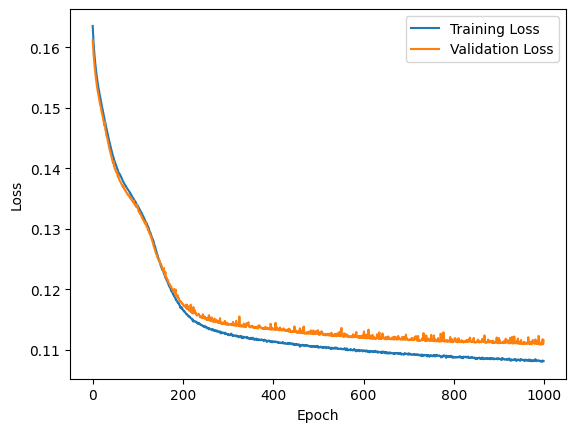

Final error:  0.109223373234272


In [19]:
# Build the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()


# Assuming X_train and Y_train are your data tensors
Y_train = Y_train.view(-1, 1)  # Reshape Y_train to have shape [8000, 1]

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, Y_train)
val_size = int(0.2 * len(train_dataset))
train_size = len(train_dataset) - val_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=0.01, weight_decay=0.001)

# Training loop
n_epochs = 1000
train_losses = []
val_losses = []
for epoch in range(n_epochs):
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        # Forward pass
        y_logits = model(X_batch)
        loss = loss_fn(y_logits, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()
    
    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_logits = model(X_batch)
            loss = loss_fn(y_logits, y_batch)
            epoch_val_loss += loss.item()
    
    epoch_val_loss /= len(val_loader)
    val_losses.append(epoch_val_loss)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{n_epochs}],Loss: {loss.item():.4f}, Training Loss: {epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}')

# Plot training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    y_logits = model(X_train)
    final_error = loss_fn(y_logits, Y_train)

print("Final error: ", final_error.item())



# Use regularization (dropout) techniques to solve the overfitting problem if there is a problem

Epoch [100/1000],Loss: 0.1751, Training Loss: 0.1580, Validation Loss: 0.1514
Epoch [200/1000],Loss: 0.1693, Training Loss: 0.1529, Validation Loss: 0.1454
Epoch [300/1000],Loss: 0.1635, Training Loss: 0.1434, Validation Loss: 0.1376
Epoch [400/1000],Loss: 0.1509, Training Loss: 0.1351, Validation Loss: 0.1305
Epoch [500/1000],Loss: 0.1375, Training Loss: 0.1292, Validation Loss: 0.1236
Epoch [600/1000],Loss: 0.1274, Training Loss: 0.1261, Validation Loss: 0.1166
Epoch [700/1000],Loss: 0.1266, Training Loss: 0.1229, Validation Loss: 0.1138
Epoch [800/1000],Loss: 0.1273, Training Loss: 0.1214, Validation Loss: 0.1124
Epoch [900/1000],Loss: 0.1267, Training Loss: 0.1188, Validation Loss: 0.1113
Epoch [1000/1000],Loss: 0.1261, Training Loss: 0.1208, Validation Loss: 0.1111


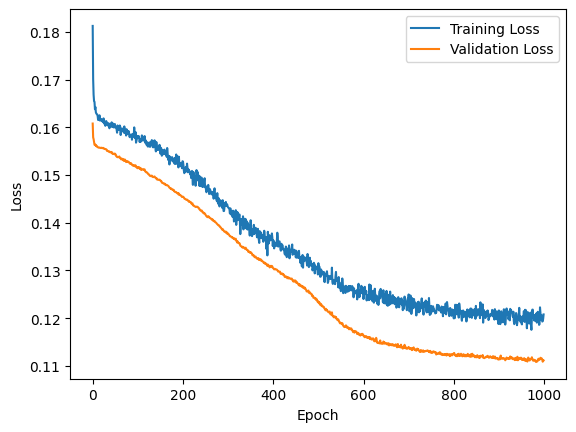

Final error:  0.11163237690925598


In [20]:
#  add dropout to your model:

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.dropout1 = nn.Dropout(0.5)  # Dropout layer
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout
        x = self.fc3(x)
        return x

model = SimpleNN()

# Assuming X_train and Y_train are your data tensors
Y_train = Y_train.view(-1, 1)  # Reshape Y_train to have shape [8000, 1]

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, Y_train)
val_size = int(0.2 * len(train_dataset))
train_size = len(train_dataset) - val_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=0.01, weight_decay=0.001)

# Training loop
n_epochs = 1000
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        # Forward pass
        y_logits = model(X_batch)
        loss = loss_fn(y_logits, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()
    
    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_logits = model(X_batch)
            loss = loss_fn(y_logits, y_batch)
            epoch_val_loss += loss.item()
    
    epoch_val_loss /= len(val_loader)
    val_losses.append(epoch_val_loss)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{n_epochs}],Loss: {loss.item():.4f}, Training Loss: {epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}')

# Plot training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    y_logits = model(X_train)
    final_error = loss_fn(y_logits, Y_train)

print("Final error: ", final_error.item())


# Investigating the effect of different values ​​for learning rate, initial values ​​of weights and activation functions in the learning process of the model and output.

Running with Learning Rate: 0.1, Activation Function: <built-in method relu of type object at 0x00007FFB18D91D40>, Initialization: he
Epoch [100/1000], Loss: 0.1094, Training Loss: 0.1281, Validation Loss: 0.1246
Epoch [200/1000], Loss: 0.1155, Training Loss: 0.1200, Validation Loss: 0.1164
Epoch [300/1000], Loss: 0.1102, Training Loss: 0.1175, Validation Loss: 0.1166
Epoch [400/1000], Loss: 0.1109, Training Loss: 0.1195, Validation Loss: 0.1145
Epoch [500/1000], Loss: 0.1090, Training Loss: 0.1183, Validation Loss: 0.1164
Epoch [600/1000], Loss: 0.1053, Training Loss: 0.1176, Validation Loss: 0.1159
Epoch [700/1000], Loss: 0.1047, Training Loss: 0.1181, Validation Loss: 0.1192
Epoch [800/1000], Loss: 0.1057, Training Loss: 0.1178, Validation Loss: 0.1189
Epoch [900/1000], Loss: 0.1085, Training Loss: 0.1169, Validation Loss: 0.1152
Epoch [1000/1000], Loss: 0.1077, Training Loss: 0.1166, Validation Loss: 0.1157


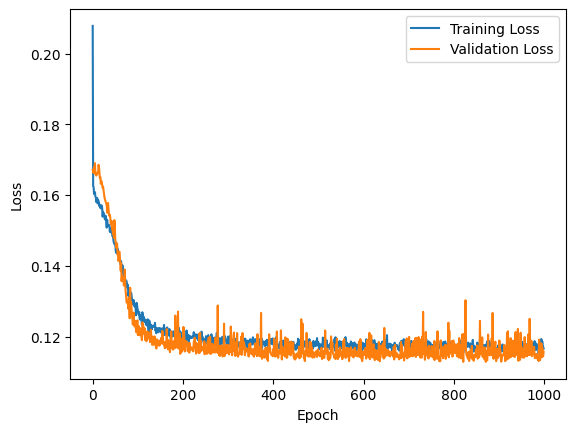

Final error:  0.11114978045225143
Running with Learning Rate: 0.1, Activation Function: <built-in method relu of type object at 0x00007FFB18D91D40>, Initialization: xavier
Epoch [100/1000], Loss: 0.1122, Training Loss: 0.1219, Validation Loss: 0.1177
Epoch [200/1000], Loss: 0.1144, Training Loss: 0.1192, Validation Loss: 0.1158
Epoch [300/1000], Loss: 0.1122, Training Loss: 0.1201, Validation Loss: 0.1151
Epoch [400/1000], Loss: 0.1126, Training Loss: 0.1198, Validation Loss: 0.1146
Epoch [500/1000], Loss: 0.1111, Training Loss: 0.1183, Validation Loss: 0.1150
Epoch [600/1000], Loss: 0.1104, Training Loss: 0.1185, Validation Loss: 0.1145
Epoch [700/1000], Loss: 0.1121, Training Loss: 0.1183, Validation Loss: 0.1145
Epoch [800/1000], Loss: 0.1083, Training Loss: 0.1182, Validation Loss: 0.1134
Epoch [900/1000], Loss: 0.1076, Training Loss: 0.1183, Validation Loss: 0.1152
Epoch [1000/1000], Loss: 0.1135, Training Loss: 0.1173, Validation Loss: 0.1150


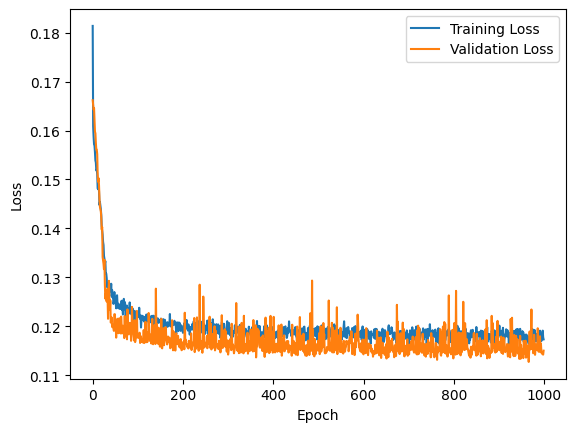

Final error:  0.1112644374370575
Running with Learning Rate: 0.1, Activation Function: <built-in method tanh of type object at 0x00007FFB18D91D40>, Initialization: he
Epoch [100/1000], Loss: 0.1220, Training Loss: 0.1437, Validation Loss: 0.1471
Epoch [200/1000], Loss: 0.1239, Training Loss: 0.1432, Validation Loss: 0.1459
Epoch [300/1000], Loss: 0.1224, Training Loss: 0.1427, Validation Loss: 0.1458
Epoch [400/1000], Loss: 0.1236, Training Loss: 0.1419, Validation Loss: 0.1453
Epoch [500/1000], Loss: 0.1247, Training Loss: 0.1430, Validation Loss: 0.1458
Epoch [600/1000], Loss: 0.1216, Training Loss: 0.1430, Validation Loss: 0.1466
Epoch [700/1000], Loss: 0.1262, Training Loss: 0.1422, Validation Loss: 0.1460
Epoch [800/1000], Loss: 0.1219, Training Loss: 0.1424, Validation Loss: 0.1459
Epoch [900/1000], Loss: 0.1212, Training Loss: 0.1427, Validation Loss: 0.1464
Epoch [1000/1000], Loss: 0.1213, Training Loss: 0.1420, Validation Loss: 0.1460


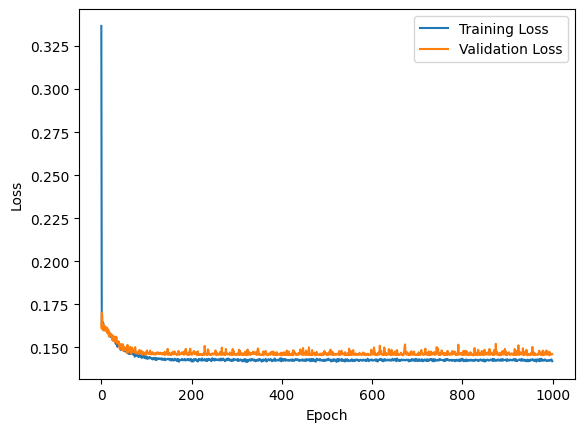

Final error:  0.14183051884174347
Running with Learning Rate: 0.1, Activation Function: <built-in method tanh of type object at 0x00007FFB18D91D40>, Initialization: xavier
Epoch [100/1000], Loss: 0.1232, Training Loss: 0.1439, Validation Loss: 0.1459
Epoch [200/1000], Loss: 0.1249, Training Loss: 0.1436, Validation Loss: 0.1460
Epoch [300/1000], Loss: 0.1262, Training Loss: 0.1425, Validation Loss: 0.1461
Epoch [400/1000], Loss: 0.1221, Training Loss: 0.1430, Validation Loss: 0.1458
Epoch [500/1000], Loss: 0.1233, Training Loss: 0.1425, Validation Loss: 0.1456
Epoch [600/1000], Loss: 0.1214, Training Loss: 0.1425, Validation Loss: 0.1478
Epoch [700/1000], Loss: 0.1269, Training Loss: 0.1427, Validation Loss: 0.1463
Epoch [800/1000], Loss: 0.1242, Training Loss: 0.1427, Validation Loss: 0.1458
Epoch [900/1000], Loss: 0.1245, Training Loss: 0.1432, Validation Loss: 0.1458
Epoch [1000/1000], Loss: 0.1237, Training Loss: 0.1428, Validation Loss: 0.1457


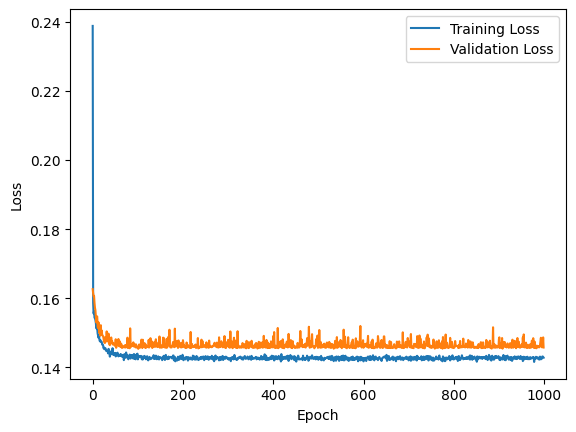

Final error:  0.14186705648899078
Running with Learning Rate: 0.1, Activation Function: LeakyReLU(negative_slope=0.01), Initialization: he
Epoch [100/1000], Loss: 0.1145, Training Loss: 0.1266, Validation Loss: 0.1215
Epoch [200/1000], Loss: 0.1132, Training Loss: 0.1218, Validation Loss: 0.1255
Epoch [300/1000], Loss: 0.1188, Training Loss: 0.1191, Validation Loss: 0.1157
Epoch [400/1000], Loss: 0.1128, Training Loss: 0.1184, Validation Loss: 0.1152
Epoch [500/1000], Loss: 0.1081, Training Loss: 0.1175, Validation Loss: 0.1201
Epoch [600/1000], Loss: 0.1092, Training Loss: 0.1180, Validation Loss: 0.1151
Epoch [700/1000], Loss: 0.1088, Training Loss: 0.1168, Validation Loss: 0.1153
Epoch [800/1000], Loss: 0.1132, Training Loss: 0.1178, Validation Loss: 0.1150
Epoch [900/1000], Loss: 0.1112, Training Loss: 0.1176, Validation Loss: 0.1140
Epoch [1000/1000], Loss: 0.1097, Training Loss: 0.1177, Validation Loss: 0.1140


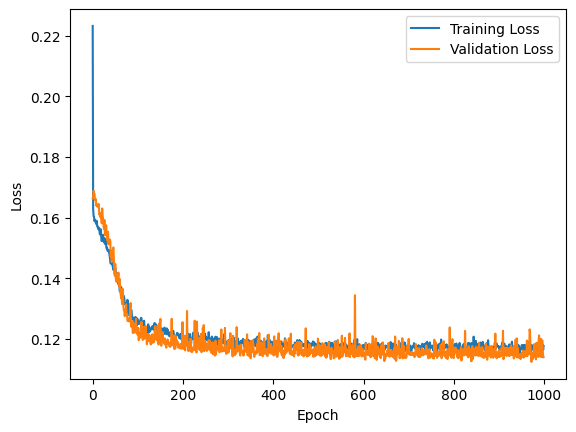

Final error:  0.11057746410369873
Running with Learning Rate: 0.1, Activation Function: LeakyReLU(negative_slope=0.01), Initialization: xavier
Epoch [100/1000], Loss: 0.1113, Training Loss: 0.1239, Validation Loss: 0.1205
Epoch [200/1000], Loss: 0.1137, Training Loss: 0.1216, Validation Loss: 0.1169
Epoch [300/1000], Loss: 0.1090, Training Loss: 0.1204, Validation Loss: 0.1202
Epoch [400/1000], Loss: 0.1108, Training Loss: 0.1193, Validation Loss: 0.1171
Epoch [500/1000], Loss: 0.1095, Training Loss: 0.1190, Validation Loss: 0.1179
Epoch [600/1000], Loss: 0.1086, Training Loss: 0.1174, Validation Loss: 0.1168
Epoch [700/1000], Loss: 0.1098, Training Loss: 0.1183, Validation Loss: 0.1159
Epoch [800/1000], Loss: 0.1102, Training Loss: 0.1184, Validation Loss: 0.1152
Epoch [900/1000], Loss: 0.1210, Training Loss: 0.1188, Validation Loss: 0.1174
Epoch [1000/1000], Loss: 0.1110, Training Loss: 0.1179, Validation Loss: 0.1146


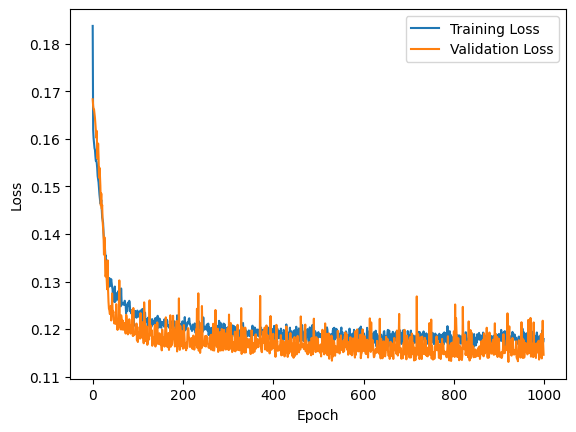

Final error:  0.1108437106013298
Running with Learning Rate: 0.01, Activation Function: <built-in method relu of type object at 0x00007FFB18D91D40>, Initialization: he
Epoch [100/1000], Loss: 0.1434, Training Loss: 0.1555, Validation Loss: 0.1617
Epoch [200/1000], Loss: 0.1389, Training Loss: 0.1529, Validation Loss: 0.1576
Epoch [300/1000], Loss: 0.1336, Training Loss: 0.1492, Validation Loss: 0.1528
Epoch [400/1000], Loss: 0.1282, Training Loss: 0.1452, Validation Loss: 0.1478
Epoch [500/1000], Loss: 0.1228, Training Loss: 0.1405, Validation Loss: 0.1424
Epoch [600/1000], Loss: 0.1183, Training Loss: 0.1383, Validation Loss: 0.1382
Epoch [700/1000], Loss: 0.1154, Training Loss: 0.1334, Validation Loss: 0.1320
Epoch [800/1000], Loss: 0.1126, Training Loss: 0.1288, Validation Loss: 0.1252
Epoch [900/1000], Loss: 0.1101, Training Loss: 0.1256, Validation Loss: 0.1233
Epoch [1000/1000], Loss: 0.1098, Training Loss: 0.1235, Validation Loss: 0.1207


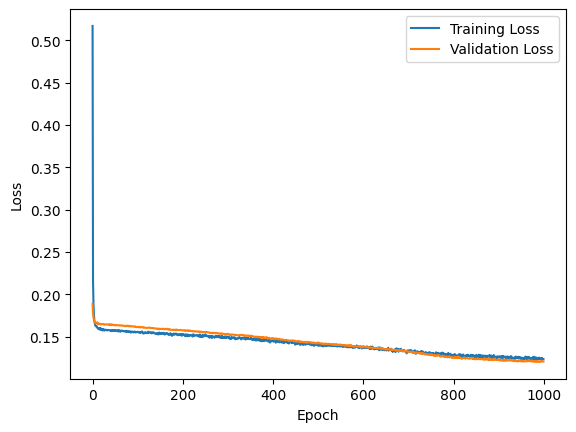

Final error:  0.11585412174463272
Running with Learning Rate: 0.01, Activation Function: <built-in method relu of type object at 0x00007FFB18D91D40>, Initialization: xavier
Epoch [100/1000], Loss: 0.1376, Training Loss: 0.1503, Validation Loss: 0.1567
Epoch [200/1000], Loss: 0.1241, Training Loss: 0.1441, Validation Loss: 0.1465
Epoch [300/1000], Loss: 0.1175, Training Loss: 0.1345, Validation Loss: 0.1317
Epoch [400/1000], Loss: 0.1119, Training Loss: 0.1271, Validation Loss: 0.1222
Epoch [500/1000], Loss: 0.1124, Training Loss: 0.1242, Validation Loss: 0.1199
Epoch [600/1000], Loss: 0.1122, Training Loss: 0.1227, Validation Loss: 0.1185
Epoch [700/1000], Loss: 0.1111, Training Loss: 0.1226, Validation Loss: 0.1178
Epoch [800/1000], Loss: 0.1116, Training Loss: 0.1221, Validation Loss: 0.1175
Epoch [900/1000], Loss: 0.1114, Training Loss: 0.1202, Validation Loss: 0.1171
Epoch [1000/1000], Loss: 0.1125, Training Loss: 0.1194, Validation Loss: 0.1163


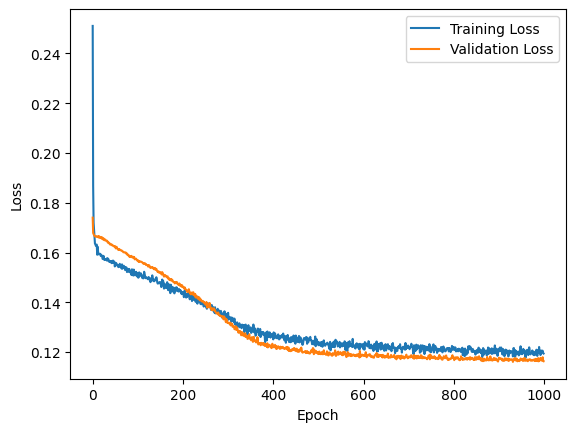

Final error:  0.1124400943517685
Running with Learning Rate: 0.01, Activation Function: <built-in method tanh of type object at 0x00007FFB18D91D40>, Initialization: he
Epoch [100/1000], Loss: 0.1384, Training Loss: 0.1544, Validation Loss: 0.1582
Epoch [200/1000], Loss: 0.1352, Training Loss: 0.1514, Validation Loss: 0.1555
Epoch [300/1000], Loss: 0.1312, Training Loss: 0.1500, Validation Loss: 0.1529
Epoch [400/1000], Loss: 0.1288, Training Loss: 0.1483, Validation Loss: 0.1506
Epoch [500/1000], Loss: 0.1263, Training Loss: 0.1466, Validation Loss: 0.1489
Epoch [600/1000], Loss: 0.1257, Training Loss: 0.1472, Validation Loss: 0.1482
Epoch [700/1000], Loss: 0.1238, Training Loss: 0.1453, Validation Loss: 0.1473
Epoch [800/1000], Loss: 0.1237, Training Loss: 0.1439, Validation Loss: 0.1468
Epoch [900/1000], Loss: 0.1233, Training Loss: 0.1443, Validation Loss: 0.1467
Epoch [1000/1000], Loss: 0.1234, Training Loss: 0.1432, Validation Loss: 0.1461


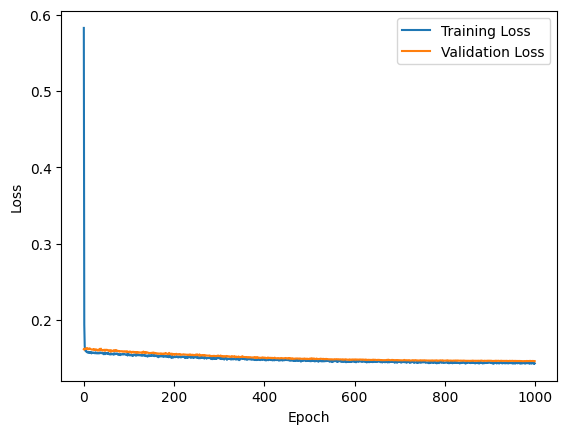

Final error:  0.14189863204956055
Running with Learning Rate: 0.01, Activation Function: <built-in method tanh of type object at 0x00007FFB18D91D40>, Initialization: xavier
Epoch [100/1000], Loss: 0.1313, Training Loss: 0.1489, Validation Loss: 0.1518
Epoch [200/1000], Loss: 0.1255, Training Loss: 0.1451, Validation Loss: 0.1480
Epoch [300/1000], Loss: 0.1242, Training Loss: 0.1429, Validation Loss: 0.1465
Epoch [400/1000], Loss: 0.1237, Training Loss: 0.1441, Validation Loss: 0.1464
Epoch [500/1000], Loss: 0.1228, Training Loss: 0.1422, Validation Loss: 0.1460
Epoch [600/1000], Loss: 0.1225, Training Loss: 0.1423, Validation Loss: 0.1458
Epoch [700/1000], Loss: 0.1224, Training Loss: 0.1422, Validation Loss: 0.1458
Epoch [800/1000], Loss: 0.1232, Training Loss: 0.1424, Validation Loss: 0.1455
Epoch [900/1000], Loss: 0.1226, Training Loss: 0.1425, Validation Loss: 0.1455
Epoch [1000/1000], Loss: 0.1221, Training Loss: 0.1421, Validation Loss: 0.1457


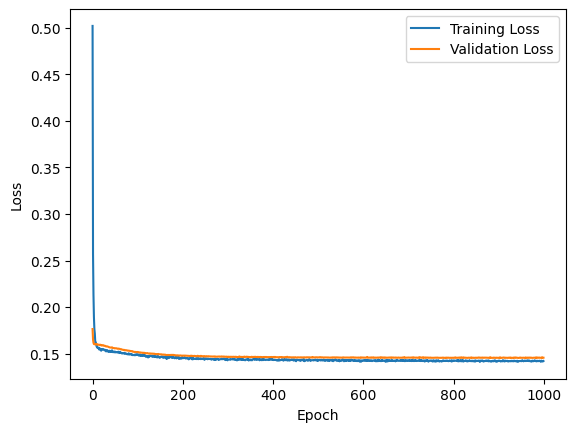

Final error:  0.14164748787879944
Running with Learning Rate: 0.01, Activation Function: LeakyReLU(negative_slope=0.01), Initialization: he
Epoch [100/1000], Loss: 0.1486, Training Loss: 0.1586, Validation Loss: 0.1646
Epoch [200/1000], Loss: 0.1402, Training Loss: 0.1545, Validation Loss: 0.1591
Epoch [300/1000], Loss: 0.1324, Training Loss: 0.1509, Validation Loss: 0.1531
Epoch [400/1000], Loss: 0.1269, Training Loss: 0.1448, Validation Loss: 0.1467
Epoch [500/1000], Loss: 0.1231, Training Loss: 0.1401, Validation Loss: 0.1401
Epoch [600/1000], Loss: 0.1193, Training Loss: 0.1347, Validation Loss: 0.1333
Epoch [700/1000], Loss: 0.1186, Training Loss: 0.1293, Validation Loss: 0.1269
Epoch [800/1000], Loss: 0.1158, Training Loss: 0.1281, Validation Loss: 0.1235
Epoch [900/1000], Loss: 0.1133, Training Loss: 0.1256, Validation Loss: 0.1222
Epoch [1000/1000], Loss: 0.1131, Training Loss: 0.1233, Validation Loss: 0.1202


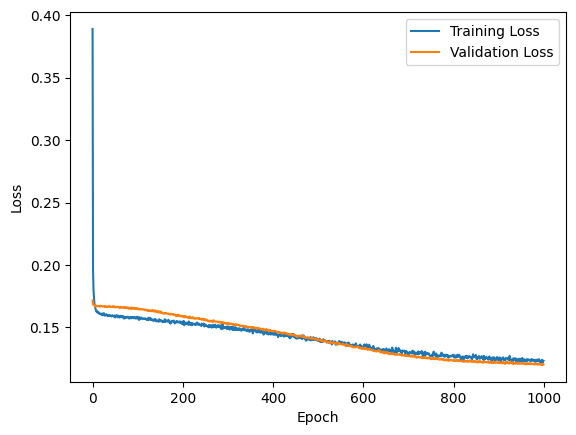

Final error:  0.1155581995844841
Running with Learning Rate: 0.01, Activation Function: LeakyReLU(negative_slope=0.01), Initialization: xavier
Epoch [100/1000], Loss: 0.1369, Training Loss: 0.1496, Validation Loss: 0.1558
Epoch [200/1000], Loss: 0.1194, Training Loss: 0.1384, Validation Loss: 0.1369
Epoch [300/1000], Loss: 0.1146, Training Loss: 0.1280, Validation Loss: 0.1256
Epoch [400/1000], Loss: 0.1142, Training Loss: 0.1267, Validation Loss: 0.1232
Epoch [500/1000], Loss: 0.1131, Training Loss: 0.1233, Validation Loss: 0.1216
Epoch [600/1000], Loss: 0.1127, Training Loss: 0.1223, Validation Loss: 0.1204
Epoch [700/1000], Loss: 0.1127, Training Loss: 0.1222, Validation Loss: 0.1192
Epoch [800/1000], Loss: 0.1116, Training Loss: 0.1209, Validation Loss: 0.1178
Epoch [900/1000], Loss: 0.1097, Training Loss: 0.1200, Validation Loss: 0.1188
Epoch [1000/1000], Loss: 0.1128, Training Loss: 0.1191, Validation Loss: 0.1170


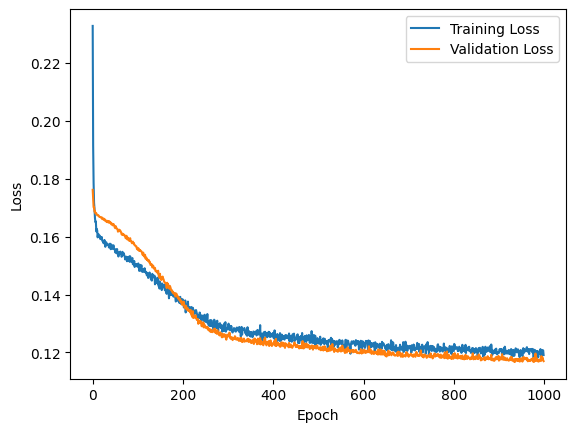

Final error:  0.11318444460630417
Running with Learning Rate: 0.001, Activation Function: <built-in method relu of type object at 0x00007FFB18D91D40>, Initialization: he
Epoch [100/1000], Loss: 0.1496, Training Loss: 0.1619, Validation Loss: 0.1665
Epoch [200/1000], Loss: 0.1492, Training Loss: 0.1581, Validation Loss: 0.1659
Epoch [300/1000], Loss: 0.1489, Training Loss: 0.1590, Validation Loss: 0.1659
Epoch [400/1000], Loss: 0.1491, Training Loss: 0.1585, Validation Loss: 0.1657
Epoch [500/1000], Loss: 0.1484, Training Loss: 0.1581, Validation Loss: 0.1654
Epoch [600/1000], Loss: 0.1481, Training Loss: 0.1562, Validation Loss: 0.1652
Epoch [700/1000], Loss: 0.1478, Training Loss: 0.1567, Validation Loss: 0.1648
Epoch [800/1000], Loss: 0.1477, Training Loss: 0.1576, Validation Loss: 0.1650
Epoch [900/1000], Loss: 0.1474, Training Loss: 0.1567, Validation Loss: 0.1646
Epoch [1000/1000], Loss: 0.1470, Training Loss: 0.1568, Validation Loss: 0.1643


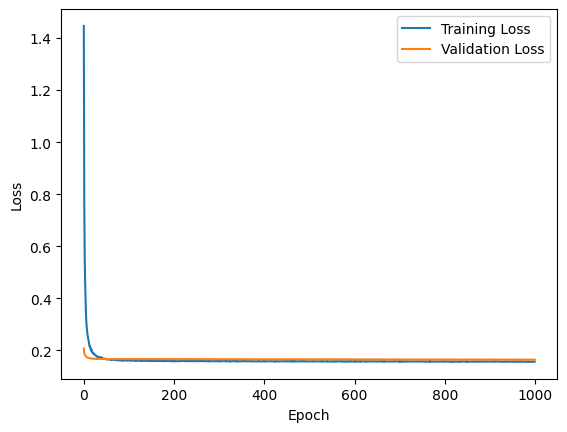

Final error:  0.15730221569538116
Running with Learning Rate: 0.001, Activation Function: <built-in method relu of type object at 0x00007FFB18D91D40>, Initialization: xavier
Epoch [100/1000], Loss: 0.1512, Training Loss: 0.1612, Validation Loss: 0.1669
Epoch [200/1000], Loss: 0.1509, Training Loss: 0.1592, Validation Loss: 0.1664
Epoch [300/1000], Loss: 0.1500, Training Loss: 0.1581, Validation Loss: 0.1655
Epoch [400/1000], Loss: 0.1485, Training Loss: 0.1567, Validation Loss: 0.1644
Epoch [500/1000], Loss: 0.1474, Training Loss: 0.1558, Validation Loss: 0.1632
Epoch [600/1000], Loss: 0.1463, Training Loss: 0.1551, Validation Loss: 0.1619
Epoch [700/1000], Loss: 0.1447, Training Loss: 0.1537, Validation Loss: 0.1606
Epoch [800/1000], Loss: 0.1426, Training Loss: 0.1523, Validation Loss: 0.1593
Epoch [900/1000], Loss: 0.1411, Training Loss: 0.1516, Validation Loss: 0.1580
Epoch [1000/1000], Loss: 0.1398, Training Loss: 0.1513, Validation Loss: 0.1567


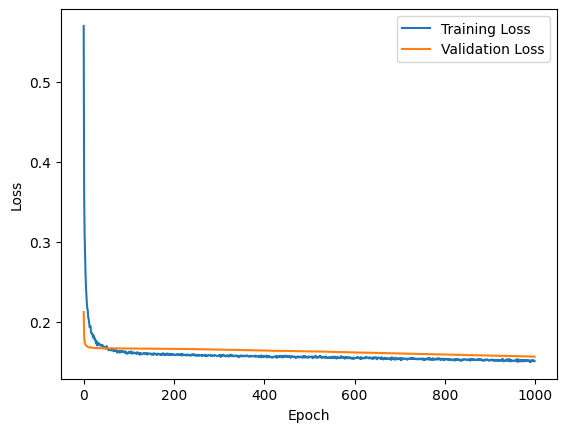

Final error:  0.15004289150238037
Running with Learning Rate: 0.001, Activation Function: <built-in method tanh of type object at 0x00007FFB18D91D40>, Initialization: he
Epoch [100/1000], Loss: 0.1429, Training Loss: 0.1561, Validation Loss: 0.1615
Epoch [200/1000], Loss: 0.1421, Training Loss: 0.1559, Validation Loss: 0.1607
Epoch [300/1000], Loss: 0.1413, Training Loss: 0.1551, Validation Loss: 0.1603
Epoch [400/1000], Loss: 0.1413, Training Loss: 0.1557, Validation Loss: 0.1603
Epoch [500/1000], Loss: 0.1408, Training Loss: 0.1557, Validation Loss: 0.1596
Epoch [600/1000], Loss: 0.1403, Training Loss: 0.1546, Validation Loss: 0.1595
Epoch [700/1000], Loss: 0.1396, Training Loss: 0.1547, Validation Loss: 0.1589
Epoch [800/1000], Loss: 0.1394, Training Loss: 0.1538, Validation Loss: 0.1587
Epoch [900/1000], Loss: 0.1389, Training Loss: 0.1537, Validation Loss: 0.1583
Epoch [1000/1000], Loss: 0.1384, Training Loss: 0.1548, Validation Loss: 0.1580


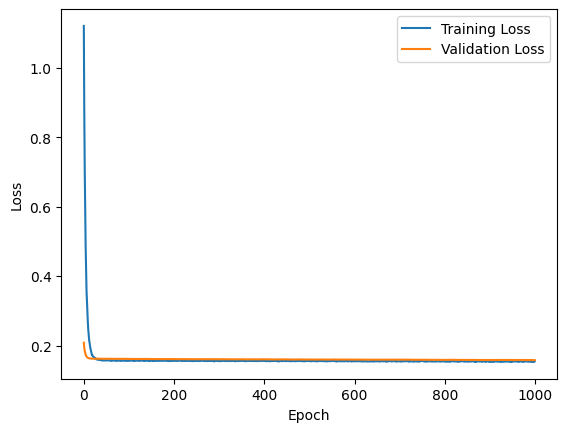

Final error:  0.15108244121074677
Running with Learning Rate: 0.001, Activation Function: <built-in method tanh of type object at 0x00007FFB18D91D40>, Initialization: xavier
Epoch [100/1000], Loss: 0.1468, Training Loss: 0.1580, Validation Loss: 0.1621
Epoch [200/1000], Loss: 0.1460, Training Loss: 0.1567, Validation Loss: 0.1618
Epoch [300/1000], Loss: 0.1450, Training Loss: 0.1554, Validation Loss: 0.1610
Epoch [400/1000], Loss: 0.1439, Training Loss: 0.1549, Validation Loss: 0.1602
Epoch [500/1000], Loss: 0.1427, Training Loss: 0.1537, Validation Loss: 0.1592
Epoch [600/1000], Loss: 0.1411, Training Loss: 0.1527, Validation Loss: 0.1581
Epoch [700/1000], Loss: 0.1399, Training Loss: 0.1536, Validation Loss: 0.1572
Epoch [800/1000], Loss: 0.1386, Training Loss: 0.1520, Validation Loss: 0.1563
Epoch [900/1000], Loss: 0.1370, Training Loss: 0.1507, Validation Loss: 0.1553
Epoch [1000/1000], Loss: 0.1358, Training Loss: 0.1502, Validation Loss: 0.1544


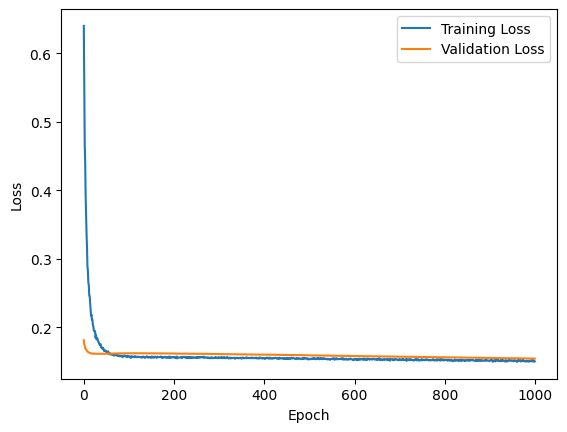

Final error:  0.1482916623353958
Running with Learning Rate: 0.001, Activation Function: LeakyReLU(negative_slope=0.01), Initialization: he
Epoch [100/1000], Loss: 0.1511, Training Loss: 0.1619, Validation Loss: 0.1664
Epoch [200/1000], Loss: 0.1511, Training Loss: 0.1599, Validation Loss: 0.1663
Epoch [300/1000], Loss: 0.1508, Training Loss: 0.1592, Validation Loss: 0.1662
Epoch [400/1000], Loss: 0.1507, Training Loss: 0.1588, Validation Loss: 0.1661
Epoch [500/1000], Loss: 0.1508, Training Loss: 0.1588, Validation Loss: 0.1659
Epoch [600/1000], Loss: 0.1504, Training Loss: 0.1585, Validation Loss: 0.1656
Epoch [700/1000], Loss: 0.1503, Training Loss: 0.1585, Validation Loss: 0.1655
Epoch [800/1000], Loss: 0.1498, Training Loss: 0.1583, Validation Loss: 0.1654
Epoch [900/1000], Loss: 0.1496, Training Loss: 0.1576, Validation Loss: 0.1653
Epoch [1000/1000], Loss: 0.1494, Training Loss: 0.1583, Validation Loss: 0.1651


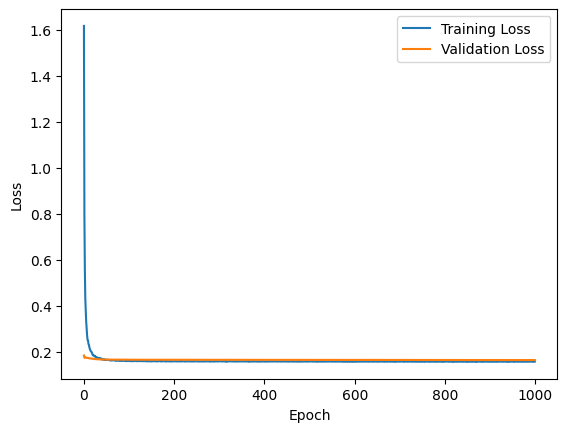

Final error:  0.1586860865354538
Running with Learning Rate: 0.001, Activation Function: LeakyReLU(negative_slope=0.01), Initialization: xavier
Epoch [100/1000], Loss: 0.1517, Training Loss: 0.1617, Validation Loss: 0.1664
Epoch [200/1000], Loss: 0.1510, Training Loss: 0.1585, Validation Loss: 0.1657
Epoch [300/1000], Loss: 0.1504, Training Loss: 0.1571, Validation Loss: 0.1653
Epoch [400/1000], Loss: 0.1497, Training Loss: 0.1577, Validation Loss: 0.1647
Epoch [500/1000], Loss: 0.1486, Training Loss: 0.1575, Validation Loss: 0.1640
Epoch [600/1000], Loss: 0.1476, Training Loss: 0.1559, Validation Loss: 0.1631
Epoch [700/1000], Loss: 0.1464, Training Loss: 0.1547, Validation Loss: 0.1620
Epoch [800/1000], Loss: 0.1449, Training Loss: 0.1548, Validation Loss: 0.1610
Epoch [900/1000], Loss: 0.1434, Training Loss: 0.1543, Validation Loss: 0.1601
Epoch [1000/1000], Loss: 0.1417, Training Loss: 0.1532, Validation Loss: 0.1590


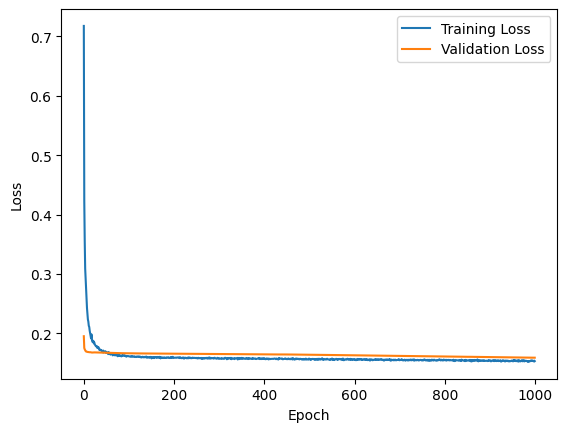

Final error:  0.1524847000837326


In [21]:
# Define the model with different activation functions and initialization methods
class SimpleNN(nn.Module):
    def __init__(self, activation_function, init_method):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)
        self.activation_function = activation_function
        self.init_weights(init_method)

    def init_weights(self, init_method):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                if init_method == 'he':
                    nn.init.kaiming_uniform_(m.weight)
                elif init_method == 'xavier':
                    nn.init.xavier_uniform_(m.weight)

    def forward(self, x):
        x = self.activation_function(self.fc1(x))
        x = self.dropout1(x)
        x = self.activation_function(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Define a function to train and evaluate the model
def train_and_evaluate(learning_rate, activation_function, init_method, X_train, Y_train, train_loader, val_loader):
    model = SimpleNN(activation_function, init_method)
    
    Y_train = Y_train.view(-1, 1)  # Reshape Y_train to have shape [8000, 1]

    loss_fn = nn.MSELoss()
    optimizer = SGD(model.parameters(), lr=learning_rate, weight_decay=0.001)

    n_epochs = 1000
    train_losses = []
    val_losses = []

    for epoch in range(n_epochs):
        model.train()
        epoch_train_loss = 0
        for X_batch, y_batch in train_loader:
            y_logits = model(X_batch)
            loss = loss_fn(y_logits, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses.append(epoch_train_loss)

        model.eval()
        epoch_val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_logits = model(X_batch)
                loss = loss_fn(y_logits, y_batch)
                epoch_val_loss += loss.item()

        epoch_val_loss /= len(val_loader)
        val_losses.append(epoch_val_loss)

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{n_epochs}], Loss: {loss.item():.4f}, Training Loss: {epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}')

    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    model.eval()
    with torch.no_grad():
        y_logits = model(X_train)
        final_error = loss_fn(y_logits, Y_train)

    print("Final error: ", final_error.item())

# Assuming X_train and Y_train are your data tensors
Y_train = Y_train.view(-1, 1)  # Reshape Y_train to have shape [8000, 1]

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, Y_train)
val_size = int(0.2 * len(train_dataset))
train_size = len(train_dataset) - val_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Example of running the experiments
learning_rates = [0.1, 0.01, 0.001]
activation_functions = [torch.relu, torch.tanh, nn.LeakyReLU()]
init_methods = ['he', 'xavier']

for lr in learning_rates:
    for activation in activation_functions:
        for init_method in init_methods:
            print(f"Running with Learning Rate: {lr}, Activation Function: {activation}, Initialization: {init_method}")
            train_and_evaluate(lr, activation, init_method, X_train, Y_train, train_loader, val_loader)
